In [ ]:
from datasets import load_dataset
DS = load_dataset('scene_parse_150')

In [ ]:
import numpy as np
import cv2
import gradio as gr
import torch

#from ade20k_colors import colors
colors = [(120, 120, 120),
          (180, 120, 120),(6, 230, 230),(80, 50, 50),(4, 200, 3),(120, 120, 80),(140, 140, 140),(204, 5, 255),(230, 230, 230),(4, 250, 7),(224, 5, 255),(235, 255, 7),(150, 5, 61),
          (120, 120, 70),(8, 255, 51),(255, 6, 82),(143, 255, 140),(204, 255, 4),(255, 51, 7),(204, 70, 3),(0, 102, 200),(61, 230, 250),(255, 6, 51),(11, 102, 255),
          (255, 7, 71),(255, 9, 224),(9, 7, 230),(220, 220, 220),(255, 9, 92),(112, 9, 255),(8, 255, 214),(7, 255, 224),(255, 184, 6),(10, 255, 71),(255, 41, 10),(7, 255, 255),(224, 255, 8),
          (102, 8, 255),(255, 61, 6),(255, 194, 7),(255, 122, 8),(0, 255, 20),(255, 8, 41),(255, 5, 153),(6, 51, 255),(235, 12, 255),(160, 150, 20),(0, 163, 255),(140, 140, 140),(250, 10, 15),
          (20, 255, 0),(31, 255, 0),(255, 31, 0),(255, 224, 0),(153, 255, 0),(0, 0, 255),(255, 71, 0),(0, 235, 255),(0, 173, 255),(31, 0, 255),(11, 200, 200),(255, 82, 0),(0, 255, 245),(0, 61, 255),
          (0, 255, 112),(0, 255, 133),(255, 0, 0),(255, 163, 0),(255, 102, 0),(194, 255, 0),(0, 143, 255),(51, 255, 0),(0, 82, 255),(0, 255, 41),(0, 255, 173),(10, 0, 255),(173, 255, 0),(0, 255, 153),
          (255, 92, 0),(255, 0, 255),(255, 0, 245),(255, 0, 102),(255, 173, 0),(255, 0, 20),(255, 184, 184),(0, 31, 255),(0, 255, 61),(0, 71, 255),(255, 0, 204),(0, 255, 194),(0, 255, 82),
          (0, 10, 255),(0, 112, 255),(51, 0, 255),(0, 194, 255),(0, 122, 255),(0, 255, 163),(255, 153, 0),(0, 255, 10),(255, 112, 0),(143, 255, 0),(82, 0, 255),(163, 255, 0),(255, 235, 0),(8, 184, 170),(133, 0, 255),(0, 255, 92),
          (184, 0, 255),(255, 0, 31),(0, 184, 255),(0, 214, 255),(255, 0, 112),(92, 255, 0),(0, 224, 255),(112, 224, 255),(70, 184, 160),(163, 0, 255),(153, 0, 255),
          (71, 255, 0),(255, 0, 163),(255, 204, 0),(255, 0, 143),(0, 255, 235),(133, 255, 0),(255, 0, 235),(245, 0, 255),(255, 0, 122),(255, 245, 0),
          (10, 190, 212),(214, 255, 0),(0, 204, 255),(20, 0, 255),(255, 255, 0),(0, 153, 255),(0, 41, 255),(0, 255, 204),(41, 0, 255),(41, 255, 0),(173, 0, 255),(0, 245, 255),(71, 0, 255),(122, 0, 255),(0, 255, 184),(0, 92, 255),(184, 255, 0),(0, 133, 255),(255, 214, 0),(25, 194, 194),(102, 255, 0),(92, 0, 255)]

from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation

beit_models = ['microsoft/beit-base-finetuned-ade-640-640']

models = [BeitForSemanticSegmentation.from_pretrained(m) for m in beit_models]
extractors = [BeitFeatureExtractor.from_pretrained(m) for m in beit_models]

In [ ]:
import matplotlib.pyplot as plt
def apply_colors(img):
    ret = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
 
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            ret[y,x] = colors[np.argmax(img[y,x])]

    return ret


def inference(image, chosen_model):
    feature_extractor = extractors[chosen_model]
    model = models[chosen_model]

    inputs = feature_extractor(images=image, return_tensors='pt')
    
    outputs = model(**inputs)

    logits = outputs.logits

    output = torch.sigmoid(logits).detach().numpy()[0]
    output = np.transpose(output, (1,2,0))

    output = apply_colors(output)
    #return cv2.resize(output, image.shape[1::-1])
    return output

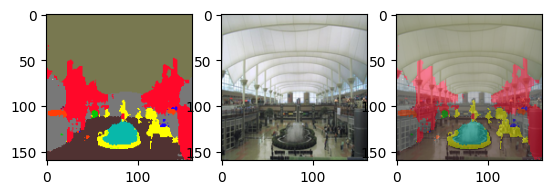

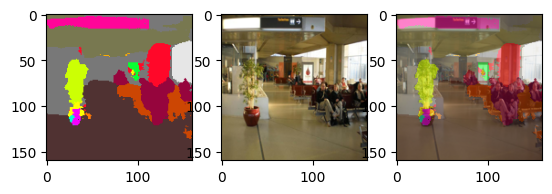

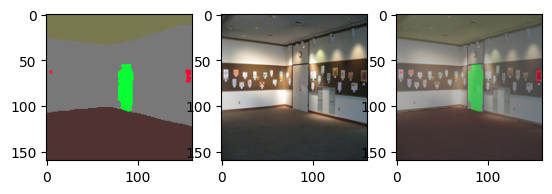

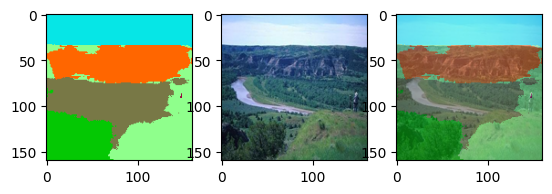

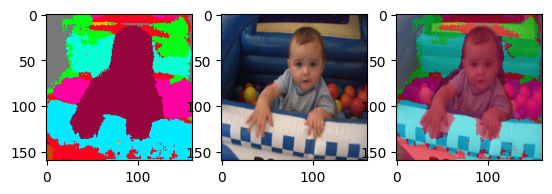

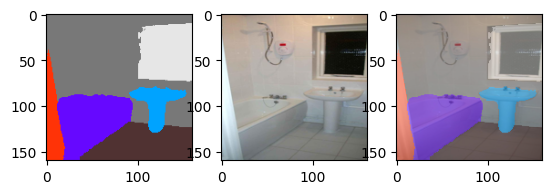

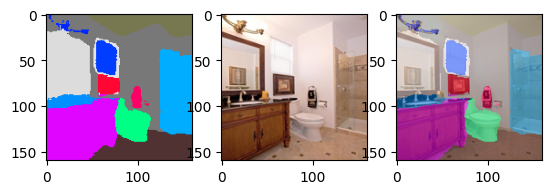

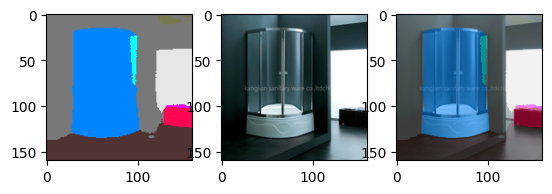

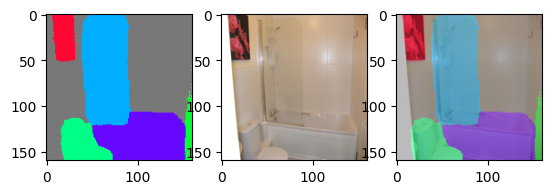

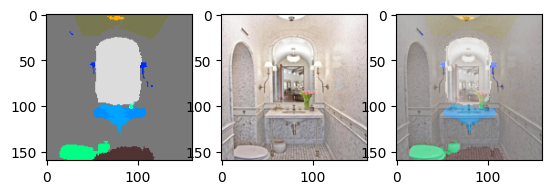

In [ ]:
for i in range(10):
    plt.subplot(1, 3, 1)
    out = inference(DS["train"][i]['image'], 0)
    plt.imshow(out)
    #plt.show()
    plt.subplot(1, 3, 2)
    plt.imshow(DS["train"][i]['image'].resize((160,160)))
    plt.subplot(1, 3, 3)
    plt.imshow(DS["train"][i]['image'].resize((160,160)))
    plt.imshow(out, alpha=0.5)
    plt.show()